In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
customers = pd.read_csv('/content/customers.csv')
geolocation = pd.read_csv('/content/geolocation.csv')
order_items = pd.read_csv('/content/order_items.csv')
order_payments = pd.read_csv('/content/order_payments.csv')
order_reviews = pd.read_csv('/content/order_reviews.csv')
orders = pd.read_csv('/content/orders.csv')
products = pd.read_csv('/content/products.csv')
sellers = pd.read_csv('/content/sellers.csv')
product_category_name_translation = pd.read_csv('/content/product_category_name_translation.csv')

## **Data Processing**

In [106]:
df1 = pd.merge(orders, order_payments, on='order_id')
df2 = pd.merge(df1, customers, on='customer_id')
df3 = pd.merge(df2, order_items, on='order_id')
df4 = pd.merge(df3, products, on='product_id')
df = pd.merge(df4, product_category_name_translation, on='product_category_name')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [107]:
df.drop(['order_approved_at', 'order_estimated_delivery_date', 'product_name_lenght', 'payment_sequential', 'customer_zip_code_prefix',
         'product_description_lenght', 'product_category_name', 'product_photos_qty', 'payment_installments',
         'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

In [108]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,payment_type,payment_value,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,boleto,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto


## **EDA**

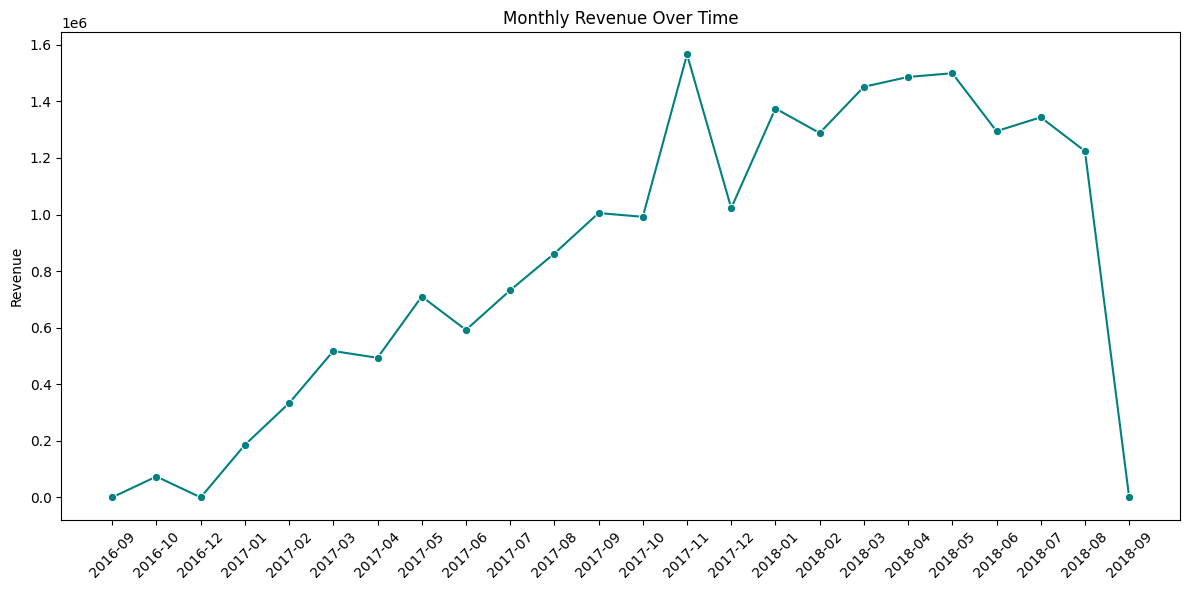

In [109]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['YearMonth'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)


monthly_revenue = df.groupby('YearMonth')['payment_value'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='payment_value', marker='o', color='teal')
plt.title('Monthly Revenue Over Time')
plt.xlabel('')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Insight:**
Revenue steadily rises from early 2017, peaks in October 2017, then dips sharply in November before stabilizing at a high level in early 2018 and gradually declining mid-2018. The zero values in December 2016 and September 2018 reflect incomplete data for those months.

### **Recommendation:**

- Stock & Promote Before Peaks: Build up inventory and launch marketing pushes ahead of October.

- Boost Slow Months: Offer discounts or limited-time deals in the slower periods (e.g. November ’17, mid-2018) to keep sales steady.

- Investigate Sudden Drops: Check for logistics or stock issues behind the November ’17 dip and fix them.

/tmp/ipython-input-128-345014942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


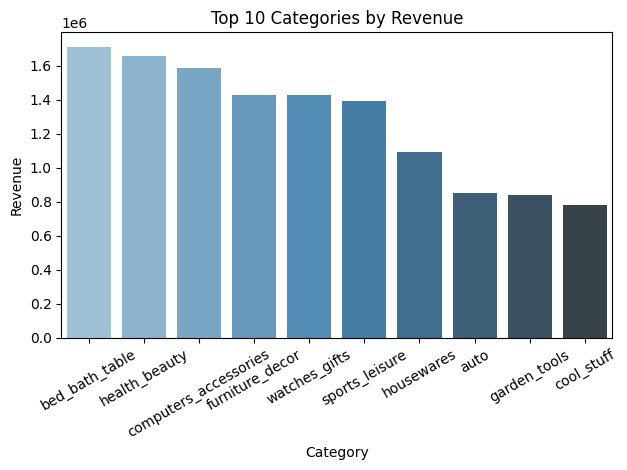

In [128]:
top_categories = df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)
top_categories_df = top_categories.reset_index()

sns.barplot(
    data=top_categories_df,
    x='product_category_name_english',
    y='payment_value',
    palette='Blues_d'
)

plt.title('Top 10 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### **Insight:**
Most of the revenue comes from a few top product categories like bed_bath_table, health_beauty, and computers_accessories. Other lifestyle categories like furniture_decor, watches_gifts, and sports_leisure also perform well, showing strong customer interest in home and personal care products.

## **Recommendation:**
- Focus marketing and stock planning on the top-selling 3-5 categories.
- Track mid-level categories like auto, garden_tools, and cool_stuff - they could grow with targeted offers.

- Try bundling related products (e.g., garden_tools + housewares) to increase order value.

/tmp/ipython-input-111-987651485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=payment_counts, x='payment_type', y='count', palette='Blues_d')


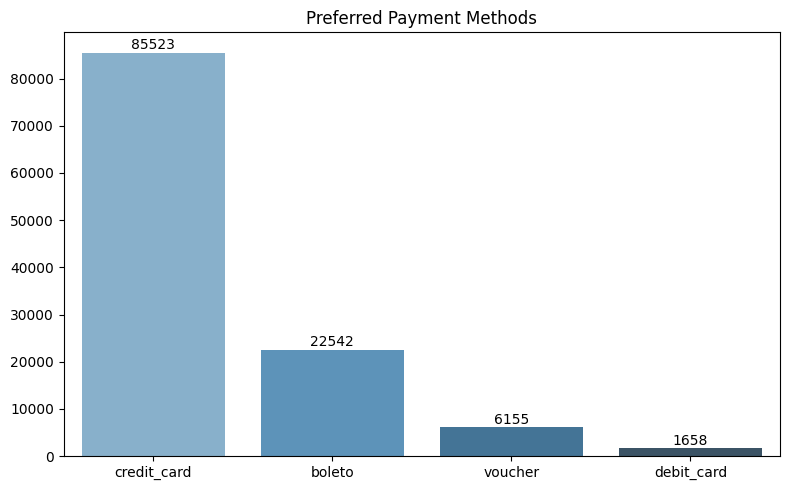

In [111]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=payment_counts, x='payment_type', y='count', palette='Blues_d')

ax.set_xlabel('')
ax.set_ylabel('')

for i, row in payment_counts.iterrows():
    ax.text(i, row['count'] + 100, f'{row["count"]}', ha='center', va='bottom', fontsize=10)

plt.title('Preferred Payment Methods')
plt.tight_layout()
plt.show()

### **Insight:**
Most customers prefer credit cards, followed by boleto. Very few use vouchers or debit cards.

### **Recommendation:**
- Make sure the credit card payment process is smooth.
- Offer occasional incentives for boleto or voucher users to boost usage.

/tmp/ipython-input-112-882234023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=state_sales, x='customer_state', y='payment_value', palette='viridis')


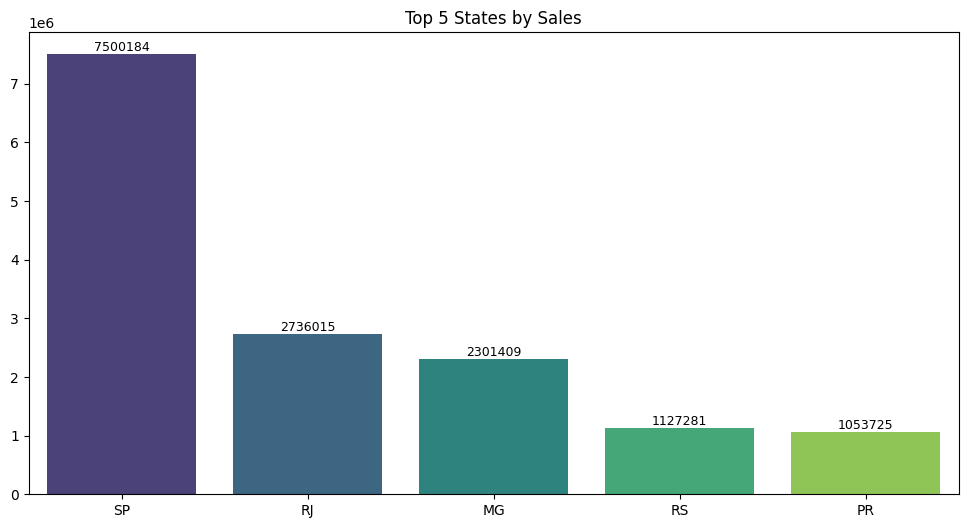

In [112]:
state_sales = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_sales, x='customer_state', y='payment_value', palette='viridis')

ax.set_xlabel('')
ax.set_ylabel('')

for i, row in state_sales.iterrows():
    ax.text(i, row['payment_value'] + 5000, f'{row["payment_value"]:.0f}',
            ha='center', va='bottom', fontsize=9)

plt.title('Top 5 States by Sales')
plt.show()

## **Insight:**
Most sales come from just 5 states, especially São Paulo (SP), which alone contributes nearly half of total revenue.

### **Recommendation:**
- Focus marketing and logistics in SP, RJ, and MG - they’re the biggest markets.
- Try boosting sales in other states through targeted campaigns or better shipping options.

/tmp/ipython-input-133-4049169773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_sellers, x='seller_id', y='payment_value', palette='cubehelix')


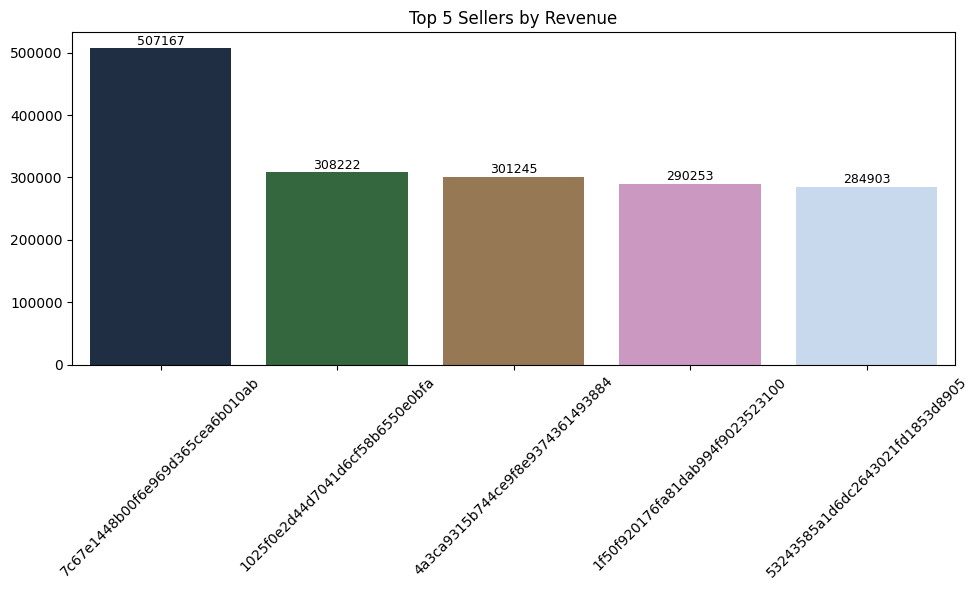

In [133]:
top_sellers = df.groupby('seller_id')['payment_value'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_sellers, x='seller_id', y='payment_value', palette='cubehelix')

ax.set_xlabel('')
ax.set_ylabel('')

for i, row in top_sellers.iterrows():
    ax.text(i, row['payment_value'] + 1000, f'{row["payment_value"]:.0f}',
            ha='center', va='bottom', fontsize=9)

plt.title('Top 5 Sellers by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Insight:**
Just 5 sellers made about 12% of total revenue, even though there are more than 3000 sellers.
That means a few sellers make most of the money.

### **Recommendation:**
- Support the top sellers more - they bring in big money.

- Study what they’re doing right, and help other sellers do the same.

- Keep an eye on small sellers - some of them might grow if given the right push.

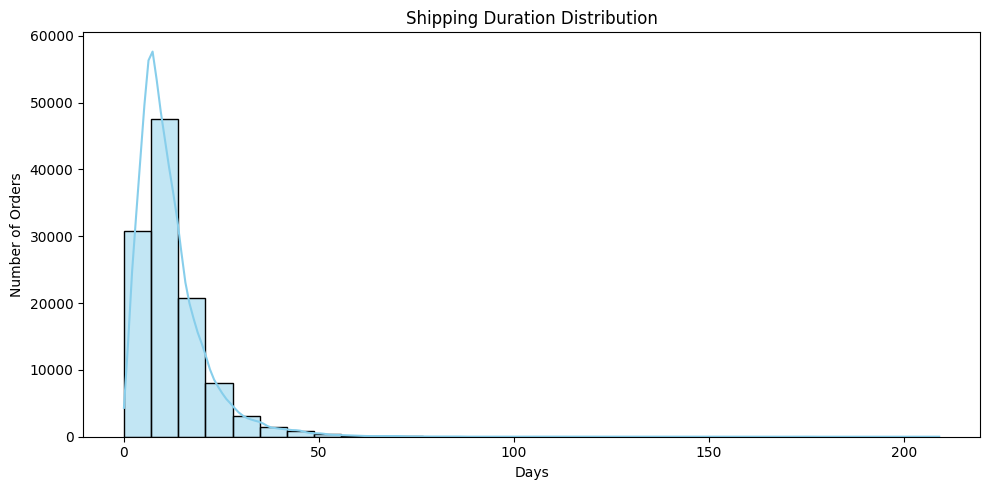

In [114]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

df['shipping_duration'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(df['shipping_duration'], bins=30, kde=True, color='skyblue')
plt.title('Shipping Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### **Insight:**
Most orders are delivered within 5-15 days, but there’s a long tail of late deliveries (20+ days) that can hurt customer satisfaction.

### **Recommendation:**
Identify and address root causes (e.g. specific routes, carriers, or product categories) for delayed shipments; set and monitor SLAs to reduce tail risk.



In [122]:
canceled_orders = df[df['order_status'] == 'canceled']
print('Number of cancelled orders =',canceled_orders['order_id'].nunique())
print('Total value of cancelled orders =',canceled_orders['payment_value'].sum())

Number of cancelled orders = 445
Total value of cancelled orders = 148145.99


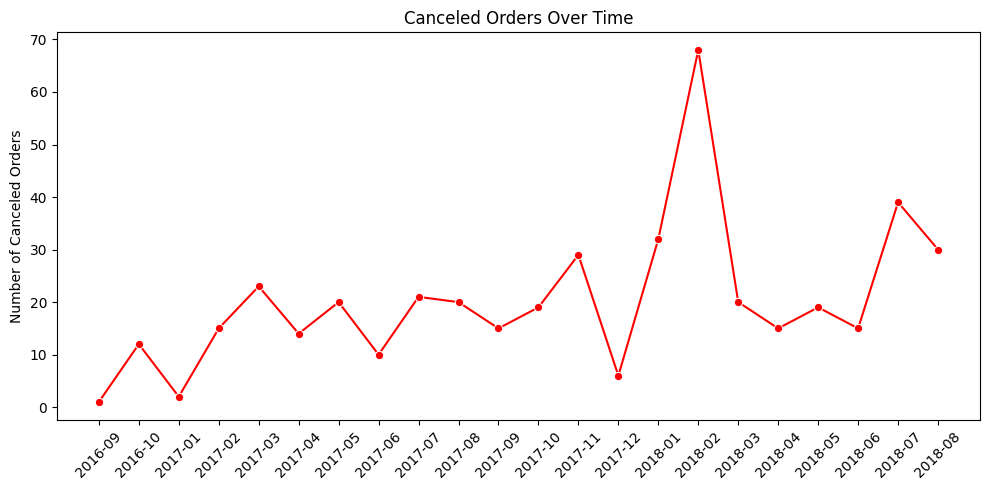

In [120]:
canceled = df[df['order_status'] == 'canceled'].copy()
canceled['month'] = canceled['order_purchase_timestamp'].dt.to_period('M')

monthly_canceled = canceled.groupby('month')['order_id'].nunique().reset_index()
monthly_canceled['month'] = monthly_canceled['month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_canceled, x='month', y='order_id', marker='o', color='red')
plt.title('Canceled Orders Over Time')
plt.xticks(rotation=45)
plt.ylabel('Number of Canceled Orders')
plt.xlabel('')
plt.tight_layout()
plt.show()

### **Insight**
There was a sharp spike in order cancellations in February 2018, reaching the highest number (around 68 orders), far above the average in other months.

### **Recommendation:**
- Investigate what happened in February 2018 - potential causes could include:
- Delivery or logistics issues
- Seller stockouts or listing errors
- Payment gateway or system outages
- Marketing campaigns that led to unfulfilled demand
- Take corrective actions and add monitoring to prevent similar future spikes.